# 🧠 Alzheimer's Trials EDA

This notebook explores the cleaned Alzheimer's clinical trial metadata from ClinicalTrials.gov.

We’ll inspect trends, demographics, sponsor activity, and study characteristics to simulate what a biostat analyst might report on.


In [ ]:

# Cell 1: the Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading cleaned data
df = pd.read_csv("../data/alzheimers_trials_clean.csv")
df.head()


## 🔍 Dataset Overview

This section prints basic info and summary stats on the dataset to understand its shape, column types, and missing data.


In [2]:
# Cell 2: the basic info
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nct_number       313 non-null    object
 1   study_title      313 non-null    object
 2   study_url        313 non-null    object
 3   study_status     313 non-null    object
 4   conditions       313 non-null    object
 5   interventions    308 non-null    object
 6   sponsor          313 non-null    object
 7   collaborators    185 non-null    object
 8   sex              313 non-null    object
 9   age              313 non-null    object
 10  phases           158 non-null    object
 11  enrollment       313 non-null    int64 
 12  study_type       313 non-null    object
 13  start_date       264 non-null    object
 14  completion_date  294 non-null    object
 15  locations        305 non-null    object
dtypes: int64(1), object(15)
memory usage: 39.3+ KB


,nct_number,study_title,study_url,study_status,conditions,interventions,sponsor,collaborators,sex,age,phases,enrollment,study_type,start_date,completion_date,locations
count,313,313,313,313,313,308,313,185,313,313,158,313.000000,313,264,294,305
unique,313,312,313,1,172,292,161,98,3,4,7,NaN,2,251,268,275
top,NCT02708186,PTI-125 for Mild-to-moderate Alzheimer's Disea...,https://clinicaltrials.gov/study/NCT02708186,completed,alzheimer disease,drug: flortaucipir f18|procedure: brain pet scan,avid radiopharmaceuticals,National Institute on Aging (NIA),all,"adult, older_adult",PHASE2,NaN,interventional,2019-03-28,2021-08-31,"university of kansas medical center, kansas ci..."
freq,1,2,1,313,56,6,11,62,307,256,75,NaN,297,4,5,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1743.507987,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14121.759883,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.000000,NaN,NaN,NaN,NaN


## ❗ Missing Data

Missing data is visualized here to help identify columns that may need further imputation or exclusion in downstream analysis.


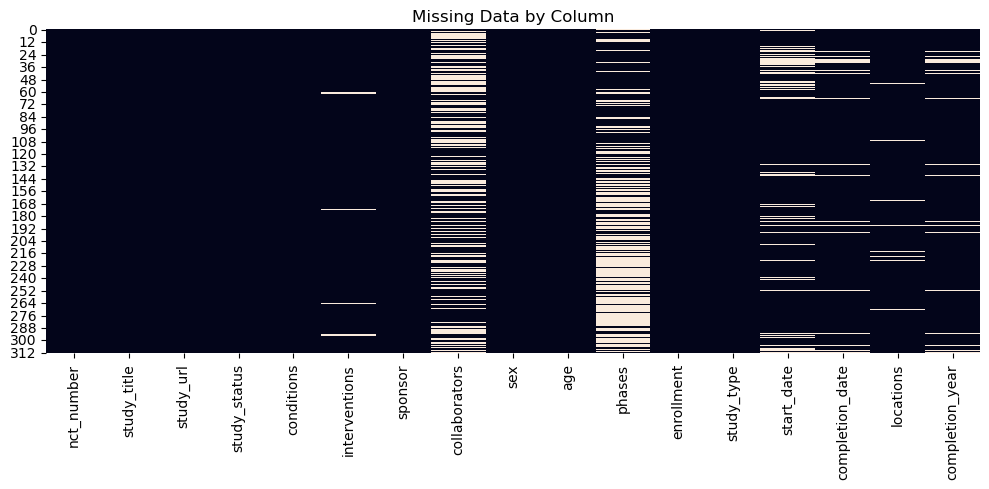

In [8]:
# Cell 3: the missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data by Column")
plt.tight_layout()
plt.savefig("../reports/missing_data.png")
plt.show()


## 🏢 Top Sponsors

This chart shows the top 10 organizations sponsoring Alzheimer's trials. Sponsors are a key metric in tracking trial volume and funding focus.


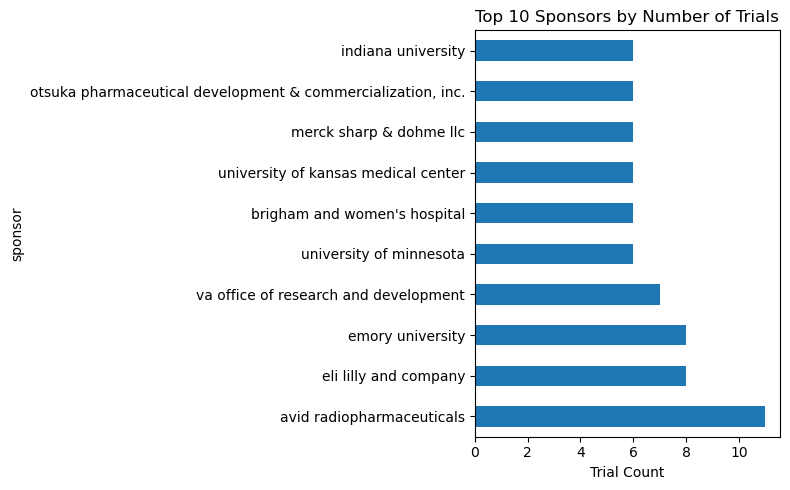

In [9]:
# Cell 4: these are the top sponsors by count
fig, ax = plt.subplots(figsize=(8, 5))
df['sponsor'].value_counts().head(10).plot(kind='barh', ax=ax)
ax.set_title("Top 10 Sponsors by Number of Trials")
ax.set_xlabel("Trial Count")
plt.tight_layout()
plt.savefig("../reports/top_sponsors.png")
plt.show()


## 🔬 Study Type Distribution

Understanding the balance of Interventional vs Observational trials helps frame how data was collected and analyzed.


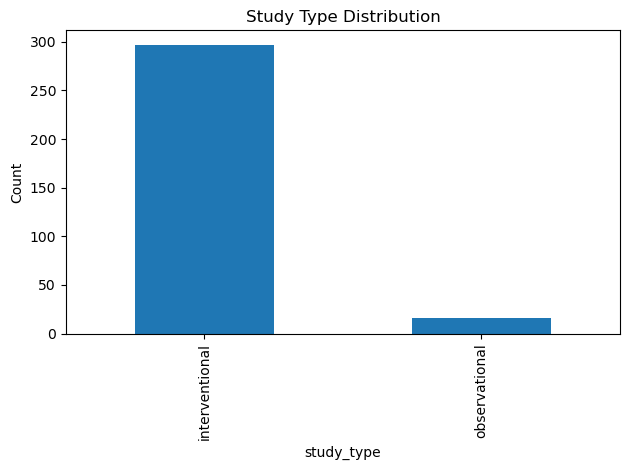

In [10]:
# Cell 5: this is the study type distribution
fig, ax = plt.subplots()
df['study_type'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Study Type Distribution")
ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/study_type_distribution.png")
plt.show()


## 🗓️ Completion Trends Over Time

This chart shows the number of trials completed each year. Trends over time reflect trial activity and can help evaluate shifts in research focus or funding.


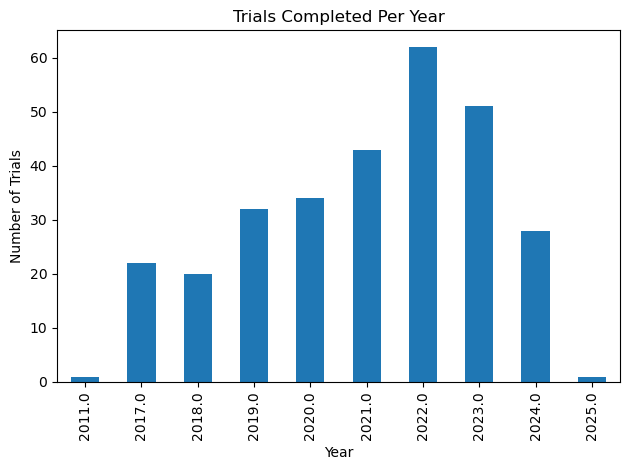

In [11]:
# Cell 6: Completion date trend
df['completion_date'] = pd.to_datetime(df['completion_date'], errors='coerce')
df['completion_year'] = df['completion_date'].dt.year

fig, ax = plt.subplots()
df['completion_year'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title("Trials Completed Per Year")
ax.set_ylabel("Number of Trials")
ax.set_xlabel("Year")
plt.tight_layout()
plt.savefig("../reports/completion_timeline.png")
plt.show()

